Spatial Data Science

Homework 10

Mariam Hovhannisyan

In [1]:
%matplotlib inline

from pysal.model import spreg
from pysal.lib import weights
from pysal.explore import esda
from scipy import stats
import statsmodels.formula.api as sm
import numpy
import pandas
import geopandas as gpd, pandas as pd
import matplotlib.pyplot as plt
import seaborn
import osmnx as ox
from shapely.geometry import Point, LineString, Polygon, MultiPolygon
from tqdm import tqdm

In [4]:
db = gpd.read_file("san_diego_regr_data.geojson")
print(db.crs)
db.head()

epsg:4326


,accommodates,bathrooms,bedrooms,beds,neighborhood,pool,d2balboa,coastal,price,log_price,...,pg_House,pg_Other,pg_Townhouse,rt_Entire_home/apt,rt_Private_room,rt_Shared_room,balboa_dist,park_dist,counts_normalised,geometry
0,5,2.0,2.0,2.0,North Hills,0,2.972077,0,425.0,6.052089,...,1,0,0,1,0,0,1776.874,1776.874,0.000007,POINT (-117.12971 32.75399)
1,2,1.0,1.0,1.0,North Hills,0,2.493893,0,99.0,4.595120,...,0,0,0,0,1,0,1540.368,1540.368,0.000007,POINT (-117.14121 32.75327)
2,2,0.0,1.0,1.0,North Hills,1,2.548985,0,65.0,4.174387,...,0,1,0,1,0,0,2595.122,2595.122,0.000007,POINT (-117.11918 32.73188)
3,2,1.0,1.0,1.0,North Hills,0,1.791777,0,42.0,3.737670,...,0,0,0,0,1,0,583.347,583.347,0.000007,POINT (-117.14423 32.74730)
4,2,1.0,1.0,1.0,North Hills,0,1.642844,0,47.0,3.850148,...,0,0,0,0,1,0,501.974,501.974,0.000007,POINT (-117.14406 32.74594)


In [7]:
#taking the needed variables and the coordinates of the most famous bay park for a future variable
variable_names = [
    'accommodates', 
    'bathrooms', 
    'bedrooms', 
    'beds', 
    'rt_Private_room', 
    'rt_Shared_room',
    'pg_Condominium', 
    'pg_House', 
    'pg_Other', 
    'pg_Townhouse'
]
bay = Point(-117.2265, 32.7778)

In [8]:
#vopying the db for modifications
data_proj = db.copy()

In [10]:
dist_bay = []

for i in tqdm(range(len(data_proj))):
    dist = bay.distance(data_proj.loc[i, "geometry"])
    dist_bay.append(bay.distance(data_proj.loc[i, "geometry"]))
    if i % 200  == 0: 
        print('The distance between the ' + str(data_proj.loc[i, "geometry"]) + " and the Mission Bay is " + str(dist))

 13%|█████████▉                                                                   | 790/6092 [00:00<00:00, 7765.17it/s]

The distance between the POINT (-117.129705218812 32.75399315770343) and the Mission Bay is 0.09967946330793266
The distance between the POINT (-117.1232915213159 32.73689081173028) and the Mission Bay is 0.1110205015174173
The distance between the POINT (-117.2543987541673 32.78652495716653) and the Mission Bay is 0.029231239481833596
The distance between the POINT (-117.2511855877189 32.76143355830727) and the Mission Bay is 0.0296182149143036
The distance between the POINT (-117.2542498400686 32.78835174207354) and the Mission Bay is 0.029688261731142477
The distance between the POINT (-117.2522384894569 32.78037080306167) and the Mission Bay is 0.025866558872519513
The distance between the POINT (-117.1413035485802 32.93209513556423) and the Mission Bay is 0.1762538629174329
The distance between the POINT (-117.2464123690285 32.74489354712147) and the Mission Bay is 0.038462151283742946
The distance between the POINT (-117.2797796334631 32.84097732296844) and the Mission Bay is 0.0

 42%|███████████████████████████████▉                                            | 2560/6092 [00:00<00:00, 8228.13it/s]

The distance between the POINT (-117.2798336104751 32.83903610395668) and the Mission Bay is 0.08120550741237219
The distance between the POINT (-117.2774674575724 32.82675515071868) and the Mission Bay is 0.07067028026888778
The distance between the POINT (-117.2414019846668 32.81435901983804) and the Mission Bay is 0.03947950200454015
The distance between the POINT (-117.2454914102284 32.79886410092012) and the Mission Bay is 0.02836141763091462
The distance between the POINT (-117.2497609570997 32.79355917423295) and the Mission Bay is 0.02809668481685636
The distance between the POINT (-117.183284247729 32.81843201946166) and the Mission Bay is 0.05931747002255912
The distance between the POINT (-117.1700554719565 32.7331663328649) and the Mission Bay is 0.0719593565005959
The distance between the POINT (-117.1608081924816 32.74336724131647) and the Mission Bay is 0.07416891832566355


 69%|████████████████████████████████████████████████████▍                       | 4201/6092 [00:00<00:00, 7785.56it/s]

The distance between the POINT (-117.2439575474823 32.7373906397579) and the Mission Bay is 0.044019113567533595
The distance between the POINT (-117.1893639152921 32.78535828153245) and the Mission Bay is 0.037897445918662856
The distance between the POINT (-117.1969358560083 32.76384700517176) and the Mission Bay is 0.03269135473848519
The distance between the POINT (-117.1411884726206 32.71835263958412) and the Mission Bay is 0.1039809855897462
The distance between the POINT (-117.2236964642437 32.86957645067632) and the Mission Bay is 0.0918192611137761
The distance between the POINT (-117.2628332040951 32.94902455263553) and the Mission Bay is 0.1750369936472095
The distance between the POINT (-117.1682730866174 32.77177073661979) and the Mission Bay is 0.058538239288327194
The distance between the POINT (-117.1267114153023 32.72572658449287) and the Mission Bay is 0.11255843921513228
The distance between the POINT (-117.1581984027887 32.71433092959165) and the Mission Bay is 0.09

100%|████████████████████████████████████████████████████████████████████████████| 6092/6092 [00:00<00:00, 7518.82it/s]

The distance between the POINT (-117.1584491905392 32.72181193282284) and the Mission Bay is 0.08812250753640866
The distance between the POINT (-117.2207791896764 32.71882104561455) and the Mission Bay is 0.05925575694528456
The distance between the POINT (-117.2339490059392 32.86730752897354) and the Mission Bay is 0.08981695515008382
The distance between the POINT (-117.1321095884573 32.78225882936017) and the Mission Bay is 0.09449566630518855
The distance between the POINT (-117.1601040789691 32.71513482594871) and the Mission Bay is 0.09129809619273818


In [11]:
db["dist_bay"] = dist_bay
db.head()

,accommodates,bathrooms,bedrooms,beds,neighborhood,pool,d2balboa,coastal,price,log_price,...,pg_Other,pg_Townhouse,rt_Entire_home/apt,rt_Private_room,rt_Shared_room,balboa_dist,park_dist,counts_normalised,geometry,dist_bay
0,5,2.0,2.0,2.0,North Hills,0,2.972077,0,425.0,6.052089,...,0,0,1,0,0,1776.874,1776.874,0.000007,POINT (-117.12971 32.75399),0.099679
1,2,1.0,1.0,1.0,North Hills,0,2.493893,0,99.0,4.595120,...,0,0,0,1,0,1540.368,1540.368,0.000007,POINT (-117.14121 32.75327),0.088750
2,2,0.0,1.0,1.0,North Hills,1,2.548985,0,65.0,4.174387,...,1,0,1,0,0,2595.122,2595.122,0.000007,POINT (-117.11918 32.73188),0.116730
3,2,1.0,1.0,1.0,North Hills,0,1.791777,0,42.0,3.737670,...,0,0,0,1,0,583.347,583.347,0.000007,POINT (-117.14423 32.74730),0.087736
4,2,1.0,1.0,1.0,North Hills,0,1.642844,0,47.0,3.850148,...,0,0,0,1,0,501.974,501.974,0.000007,POINT (-117.14406 32.74594),0.088384


In [14]:
vars_new = variable_names + ['dist_bay']

In [18]:
#ols predicting price based on the new variables
m = spreg.OLS(
    db[['log_price']].values, 
    db[vars_new].values, 
    name_y = 'log_price', 
    name_x = vars_new
)
print(m.summary)
#Adj-R = 0.67 - nor great, nor terrible

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   log_price                Number of Observations:        6092
Mean dependent var  :      4.9976                Number of Variables   :          12
S.D. dependent var  :      0.8072                Degrees of Freedom    :        6080
R-squared           :      0.6737
Adjusted R-squared  :      0.6731
Sum squared residual:    1295.168                F-statistic           :   1141.0754
Sigma-square        :       0.213                Prob(F-statistic)     :           0
S.E. of regression  :       0.462                Log likelihood        :   -3927.942
Sigma-square ML     :       0.213                Akaike info criterion :    7879.884
S.E of regression ML:      0.4611                Schwarz criterion     :    7960.461

-----------------------------------------------------------------------------

C:\Users\Admin\Anaconda3\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 1847 disconnected components.
  warnings.warn(message)


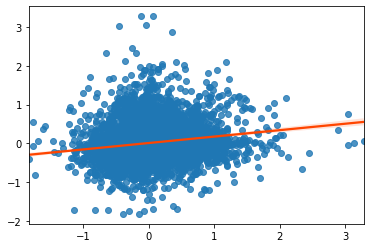

In [20]:
knn = weights.KNN.from_dataframe(db, k=1)
lag_residual = weights.spatial_lag.lag_spatial(knn, m.u)
seaborn.regplot(
    x = m.u.flatten(), 
    y = lag_residual.flatten(), 
    line_kws=dict(color='orangered')
);

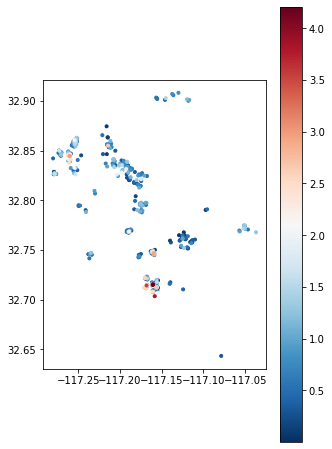

In [22]:
knn.reweight(k=20, inplace=True)
outliers = esda.moran.Moran_Local(m.u, knn, permutations=9999)
error_clusters = (outliers.q % 2 == 1) # only the cluster cores
error_clusters &= (outliers.p_sim <= .001) # filtering out non-significant clusters
db_I = db.assign(
    error_clusters = error_clusters,
    local_I = outliers.Is
).query(
    "error_clusters"
).sort_values(
    'local_I'
)

f, ax = plt.subplots(1, figsize=(5, 8))
db_I.plot('local_I', cmap='RdBu_r', marker='.', ax=ax, legend=True)
plt.show()

<AxesSubplot:>

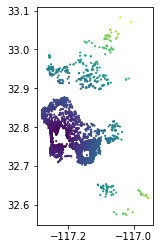

In [23]:
db["dist_bay"] = pd.to_numeric(db["dist_bay"], downcast="float") 
db.plot('dist_bay', marker='.', s=5)

In [25]:
f = 'log_price ~ ' + ' + '.join(vars_new) + ' + neighborhood - 1'
m1 = sm.ols(f, data=db).fit()
print(m1.summary2())
#Adj-R = 0.709 better 

                           Results: Ordinary least squares
Model:                      OLS                    Adj. R-squared:           0.709    
Dependent Variable:         log_price              AIC:                      7211.1028
Date:                       2021-08-10 00:28       BIC:                      7587.1278
No. Observations:           6092                   Log-Likelihood:           -3549.6  
Df Model:                   55                     F-statistic:              271.0    
Df Residuals:               6036                   Prob (F-statistic):       0.00     
R-squared:                  0.712                  Scale:                    0.18951  
--------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------------
neighborhood[Balboa Park]              4.3233   0.0553  78.2261 0.0000 

In [26]:
#how the features influence each of the neighbourhood
neighborhood_effects = m1.params.filter(like='neighborhood')

stripped = neighborhood_effects.index.str.strip('neighborhood[').str.strip(']')
neighborhood_effects.index = stripped
neighborhood_effects = neighborhood_effects.to_frame('fixed_effect')
neighborhood_effects.head()

,fixed_effect
Balboa Park,4.323340
Bay Ho,4.216248
Bay Park,4.340455
Carmel Valley,4.454676
City Heights West,4.100971


In [27]:
neighborhoods = gpd.read_file('neighbourhoods_san_diego.geojson')
neighborhoods.head()

,neighbourhood,neighbourhood_group,geometry
0,Amphitheater And Water Park,None,"MULTIPOLYGON (((-117.01452 32.58790, -117.0144..."
1,Bella Lago,None,"MULTIPOLYGON (((-116.94128 32.68431, -116.9412..."
2,Bonita Long Canyon,None,"MULTIPOLYGON (((-117.01149 32.66352, -117.0114..."
3,East Lake,None,"MULTIPOLYGON (((-116.99302 32.66040, -116.9816..."
4,Eastlake Trails,None,"MULTIPOLYGON (((-116.95512 32.64124, -116.9550..."


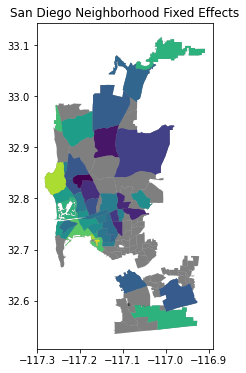

In [28]:
ax = neighborhoods.plot(
    color='k', alpha=0.5, figsize=(12,6)
)
neighborhoods.merge(
    neighborhood_effects, 
    how='left',
    left_on='neighbourhood', 
    right_index=True).dropna(subset=['fixed_effect']).plot('fixed_effect', ax=ax)

ax.set_title("San Diego Neighborhood Fixed Effects")
plt.show()

We see that the disance from the bay affects the neighbourhood the bay is situated in at first, and then does have a connection with the rest of the neghborhoods 